<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ideas:" data-toc-modified-id="Ideas:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ideas:</a></span></li><li><span><a href="#Data-exploratory-and-cleaning-(wrangle-data)" data-toc-modified-id="Data-exploratory-and-cleaning-(wrangle-data)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exploratory and cleaning (wrangle data)</a></span><ul class="toc-item"><li><span><a href="#Data-source-for-meteology" data-toc-modified-id="Data-source-for-meteology-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data source for meteology</a></span></li><li><span><a href="#Working-on-Noibai-site" data-toc-modified-id="Working-on-Noibai-site-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Working on Noibai site</a></span></li><li><span><a href="#Working-with-Hadong-site" data-toc-modified-id="Working-with-Hadong-site-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Working with Hadong site</a></span></li></ul></li><li><span><a href="#Relative-humidity-is-not-exist,-could-we-somehow-calculate-them?" data-toc-modified-id="Relative-humidity-is-not-exist,-could-we-somehow-calculate-them?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Relative humidity is not exist, could we somehow calculate them?</a></span></li><li><span><a href="#let-compare-two-sites-and-see-anything-interesting?" data-toc-modified-id="let-compare-two-sites-and-see-anything-interesting?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>let compare two sites and see anything interesting?</a></span><ul class="toc-item"><li><span><a href="#Temperature" data-toc-modified-id="Temperature-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Temperature</a></span></li><li><span><a href="#Wind" data-toc-modified-id="Wind-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Wind</a></span></li><li><span><a href="#Relative-Humidity" data-toc-modified-id="Relative-Humidity-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Relative Humidity</a></span></li><li><span><a href="#Ceiling-height" data-toc-modified-id="Ceiling-height-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Ceiling height</a></span></li></ul></li><li><span><a href="#Concluding-notes" data-toc-modified-id="Concluding-notes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Concluding notes</a></span></li></ul></div>

# Ideas:
- working on NOAA csv file to clean data from CSV file to numeric field (column)
- Try out some correlation of meteorological paramater with PM<sub>2.5</sub> concentration
- How wind speed (and direction)?
- Do temperature and relative humidity change PM<sub>2.5</sub>?
- What else do we have? 

<em style='color: red'>**For this part, we will focus on getting data, and clean data first, the second part will be on analysis**</em>

# Data exploratory and cleaning (wrangle data)

## Data source for meteology

- depend on where you live, the availablity data to the public use differs
- those experienced a higher with PM<sub>2.5</sub> are in developing countries, and implementation of sharing data is limited
- Open API (Application Program Interface) such as [Darksky.net recently acquired by Apple](darksky.net), [Openweathermap.org](openweather.org) offers a limited access with free membership. Darksky has been my favorite one to get historical data but recently new registration is no longer open, and a future use is remained to be seen,
- It not always the case, but during search for such data, I often find that research institute in the US like EPA, NOAA are archieved data systematically. 
- In this section, we will use meteological data availablity to public use by [NCEI](ncei.noaa.gov). We do need to understand the format, and clean the data so that it can be usable for analysism


**ref on NCEI.NOAA**

- how each data file is formated: https://www.ncei.noaa.gov/data/global-hourly/doc/isd-format-document.pdf
- a collection of data: https://www.ncei.noaa.gov/access/search/data-search/global-hourly


## Working on Noibai site

In [2]:
import pandas as pd

In [2]:
# we will continue to work with 2018, location is Hanoi
year = 2018
site = 488200 # NOIBAI AIRPORT
base_url = f'https://www.ncei.noaa.gov/data/global-hourly/access/{year}/{site}99999.csv'

In [3]:
df = pd.read_csv(base_url)
df.head()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,GA4,GE1,GF1,MA1,MW1,MW2,MW3,OC1,REM,EQD
0,48820099999,2018-01-01T00:00:00,4,21.221192,105.807178,11.88,"NOIBAI INTERNATIONAL, VM",FM-15,99999,V020,...,NaN,"9,MSL ,+99999,+99999","99,99,9,07,1,99,9,01067,1,99,9,99,9","10190,1,99999,9",NaN,NaN,NaN,NaN,MET057METAR VVNB 010000Z 08003KT 8000 BKN035 1...,NaN
1,48820099999,2018-01-01T00:30:00,4,21.221192,105.807178,11.88,"NOIBAI INTERNATIONAL, VM",FM-15,99999,V020,...,NaN,"9,MSL ,+99999,+99999","99,99,9,07,1,99,9,00975,1,99,9,99,9","10190,1,99999,9",NaN,NaN,NaN,NaN,MET057METAR VVNB 010030Z 06003KT 8000 BKN032 1...,NaN
2,48820099999,2018-01-01T01:00:00,4,21.221192,105.807178,11.88,"NOIBAI INTERNATIONAL, VM",FM-15,99999,V020,...,NaN,"9,MSL ,+99999,+99999","99,99,9,07,1,99,9,00975,1,99,9,99,9","10200,1,99999,9",NaN,NaN,NaN,NaN,MET057METAR VVNB 010100Z 08003KT 7000 BKN032 1...,NaN
3,48820099999,2018-01-01T01:30:00,4,21.221192,105.807178,11.88,"NOIBAI INTERNATIONAL, VM",FM-15,99999,V020,...,NaN,"9,MSL ,+99999,+99999","99,99,9,07,1,99,9,00975,1,99,9,99,9","10200,1,99999,9",NaN,NaN,NaN,NaN,MET065METAR VVNB 010130Z 06004KT 360V080 7000 ...,NaN
4,48820099999,2018-01-01T02:00:00,4,21.221192,105.807178,11.88,"NOIBAI INTERNATIONAL, VM",FM-15,99999,V020,...,NaN,"9,MSL ,+99999,+99999","99,99,9,04,1,99,9,00762,1,99,9,99,9","10200,1,99999,9",NaN,NaN,NaN,NaN,MET064METAR VVNB 010200Z 08006KT 7000 SCT025 B...,NaN


In [4]:
# or value of one row
df.iloc[0]

STATION                                                  48820099999
DATE                                             2018-01-01T00:00:00
SOURCE                                                             4
LATITUDE                                                     21.2212
LONGITUDE                                                    105.807
ELEVATION                                                      11.88
NAME                                        NOIBAI INTERNATIONAL, VM
REPORT_TYPE                                                    FM-15
CALL_SIGN                                                      99999
QUALITY_CONTROL                                                 V020
WND                                                   080,1,N,0015,1
CIG                                                      01067,1,C,N
VIS                                                     008000,1,9,9
TMP                                                          +0160,1
DEW                               

**What in here?**
- columns from `Station` to `Quality_control` is metadata (or data about data)
- we have wind, tempeature, and few other

In [5]:
# let save the raw file, so if you want to work on it directly,
df.to_csv('data/noibai_noaa_isd_2018.csv', index=False)

In [3]:
# and read again, this time from local file
df = pd.read_csv('data/noibai_noaa_isd_2018.csv')

In [4]:
# a few exploratory functions
df.columns

Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'GA1', 'GA2', 'GA3', 'GA4', 'GE1', 'GF1',
       'MA1', 'MW1', 'MW2', 'MW3', 'OC1', 'REM', 'EQD'],
      dtype='object')

In [8]:
df.shape

(16911, 29)

In [9]:
df.describe()

,STATION,SOURCE,LATITUDE,LONGITUDE,ELEVATION,CALL_SIGN
count,1.691100e+04,16911.0,1.691100e+04,1.691100e+04,1.691100e+04,16911.0
mean,4.882010e+10,4.0,2.122119e+01,1.058072e+02,1.188000e+01,99999.0
std,0.000000e+00,0.0,5.403837e-12,1.078636e-11,2.762317e-12,0.0
min,4.882010e+10,4.0,2.122119e+01,1.058072e+02,1.188000e+01,99999.0
25%,4.882010e+10,4.0,2.122119e+01,1.058072e+02,1.188000e+01,99999.0
50%,4.882010e+10,4.0,2.122119e+01,1.058072e+02,1.188000e+01,99999.0
75%,4.882010e+10,4.0,2.122119e+01,1.058072e+02,1.188000e+01,99999.0
max,4.882010e+10,4.0,2.122119e+01,1.058072e+02,1.188000e+01,99999.0


In [5]:
# now will want to create a list of columns that contain Wind, Temperature and relevant data
cols = ['DATE', 'WND', 'CIG', 'VIS', 'TMP', 'DEW', 'GA1']

In [6]:
# and select those columns, reassign to the df name
df = df[cols]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16911 entries, 0 to 16910
Data columns (total 7 columns):
DATE    16911 non-null object
WND     16911 non-null object
CIG     16911 non-null object
VIS     16911 non-null object
TMP     16911 non-null object
DEW     16911 non-null object
GA1     11853 non-null object
dtypes: object(7)
memory usage: 924.9+ KB


In [13]:
df.head(3)

,DATE,WND,CIG,VIS,TMP,DEW,GA1
0,2018-01-01T00:00:00,"080,1,N,0015,1","01067,1,C,N","008000,1,9,9","+0160,1","+0120,1","07,1,+01067,1,99,9"
1,2018-01-01T00:30:00,"060,1,N,0015,1","00975,1,C,N","008000,1,9,9","+0160,1","+0120,1","07,1,+00975,1,99,9"
2,2018-01-01T01:00:00,"080,1,N,0015,1","00975,1,C,N","007000,1,9,9","+0160,1","+0120,1","07,1,+00975,1,99,9"


In [8]:
# again a smaller file, just in case you need it later
df.to_csv('data/reduced_noibai_noaa_isd_2018_2.csv', index=False)

**Wait, each column contains other types of data rather numeric values!!**

- yes, they are formatted with a QA/QC inplace
- let take sometime to read through a description for one parameter, in this case `TMP` or air temperature

**Time to read some manual**, here is what I found for **TMP** term, more on [ncei.noaa.gov]  (https://www.ncei.noaa.gov/data/global-hourly/doc/isd-format-document.pdf) 

**POS: 88-92**
    **AIR-TEMPERATURE-OBSERVATION air temperature**  
    
     The temperature of the air.  
     MIN: -0932 MAX: +0618 UNITS: Degrees Celsius  
     SCALING FACTOR: 10  
     DOM: A general domain comprised of the numeric characters (0-9), a plus sign (+), and a minus sign (-). +9999 = Missing.  

**POS: 93-93**
    **AIR-TEMPERATURE-OBSERVATION air temperature quality code**  
    
     The code that denotes a quality status of an AIR-TEMPERATURE-OBSERVATION.  
     DOM: A specific domain comprised of the characters in the ASCII character set.  
     
     0 = Passed gross limits check  
     1 = Passed all quality control checks  
     2 = Suspect  
     3 = Erroneous  
     4 = Passed gross limits check, data originate from an NCEI data source  
     5 = Passed all quality control checks, data originate from an NCEI data source  
     6 = Suspect, data originate from an NCEI data source  
     7 = Erroneous, data originate from an NCEI data source  
     9 = Passed gross limits check if element is present  
     A = Data value flagged as suspect, but accepted as a good value  
     C = Temperature and dew point received from Automated Weather Observing System (AWOS) are reported in  
        whole degrees Celsius. Automated QC flags these values, but they are accepted as valid.  
     I = Data value not originally in data, but inserted by validator  
     M = Manual changes made to value based on information provided by NWS or FAA  
     P = Data value not originally flagged as suspect, but replaced by validator  
     R = Data value replaced with value computed by NCEI software  
     U = Data value replaced with edited value  
     
*so if the value code is **3**, or **7**, the data should not be used*, let see what the distribution of the quality code on **TMP**

In [15]:
# let work on TMP by first splitting each column by the comma, the option expand=True, as the name implies
# expand each field to a columns
df['TMP'].str.split(pat=',', expand=True).sample(5)

,0,1
14248,+0240,1
12056,+0270,1
16490,+0240,1
7297,+0320,1
2569,+0160,1


In [16]:
df['TMP'].str.split(pat=',', expand=True)[1].value_counts(normalize=True)
# for the file I were working on, only a few instance with code 5, so the TMP will be processed as it is

1    0.999113
5    0.000532
2    0.000355
Name: 1, dtype: float64

In [17]:
# the scaling factor is 10, to take temperature,
# 1. take the first element
# 2. cast type is int(eger)
# 3. deviding to 10
df['TMP'].str.split(pat=',', expand=True)[0].astype(int)/10

0        16.0
1        16.0
2        16.0
3        17.0
4        17.0
         ... 
16906    11.0
16907    11.0
16908    11.0
16909    11.0
16910    11.0
Name: 0, Length: 16911, dtype: float64

In [18]:
# and assign processed value back to the columns
df['TMP'] = df['TMP'].str.split(pat=',', expand=True)[0].astype(int)/10
df.head(3)

,DATE,WND,CIG,VIS,TMP,DEW,GA1
0,2018-01-01T00:00:00,"080,1,N,0015,1","01067,1,C,N","008000,1,9,9",16.0,"+0120,1","07,1,+01067,1,99,9"
1,2018-01-01T00:30:00,"060,1,N,0015,1","00975,1,C,N","008000,1,9,9",16.0,"+0120,1","07,1,+00975,1,99,9"
2,2018-01-01T01:00:00,"080,1,N,0015,1","00975,1,C,N","007000,1,9,9",16.0,"+0120,1","07,1,+00975,1,99,9"


In [19]:
# Dewpoint temperature is processed the same way
df['DEW'] = df['DEW'].str.split(pat=',', expand=True)[0].astype(int)/10
df.head(3)

,DATE,WND,CIG,VIS,TMP,DEW,GA1
0,2018-01-01T00:00:00,"080,1,N,0015,1","01067,1,C,N","008000,1,9,9",16.0,12.0,"07,1,+01067,1,99,9"
1,2018-01-01T00:30:00,"060,1,N,0015,1","00975,1,C,N","008000,1,9,9",16.0,12.0,"07,1,+00975,1,99,9"
2,2018-01-01T01:00:00,"080,1,N,0015,1","00975,1,C,N","007000,1,9,9",16.0,12.0,"07,1,+00975,1,99,9"


In [20]:
# What is this parameter?
df['CIG']

0        01067,1,C,N
1        00975,1,C,N
2        00975,1,C,N
3        00975,1,C,N
4        01006,1,9,N
            ...     
16906    01250,1,C,N
16907    01250,1,C,N
16908    01219,1,C,N
16909    01219,1,C,N
16910    01158,1,C,N
Name: CIG, Length: 16911, dtype: object

here is the definition from [weather.gove](https://forecast.weather.gov/glossary.php?word=cig) 
 > CIG: Ceiling- The height of the lowest layer of clouds, when the sky is broken or overcast.

**POS: 71-75** 
 **SKY-CONDITION-OBSERVATION ceiling height dimension**  
 
    The height above ground level (AGL) of the lowest cloud or obscuring phenomena layer aloft with 5/8 or more summation total skycover, which may be predominantly opaque, or the vertical visibility into a surface-based obstruction. 
    Unlimited = 22000. MIN: 00000 MAX: 22000 UNITS: Meters  
    SCALING FACTOR: 1  
    DOM: A general domain comprised of the numeric characters (0-9).  
    99999 = Missing.  

In [21]:
# we have 2/3 data is passed with confident, and 1/3 is take-it-as-it-is
df['CIG'].str.split(pat=',', expand=True)[1].value_counts()

1    10942
9     5969
Name: 1, dtype: int64

In [22]:
df['CIG'].str.split(pat=',', expand=True)[0].astype(int)

0        1067
1         975
2         975
3         975
4        1006
         ... 
16906    1250
16907    1250
16908    1219
16909    1219
16910    1158
Name: 0, Length: 16911, dtype: int64

In [23]:
 df['CIG'] =  df['CIG'].str.split(pat=',', expand=True)[0].astype(int)

In [24]:
df.query('CIG==99999')

,DATE,WND,CIG,VIS,TMP,DEW,GA1
330,2018-01-07T21:30:00,"100,1,N,0026,1",99999,"001500,1,9,9",21.0,20.0,"04,1,+00091,1,99,9"
405,2018-01-09T11:00:00,"020,1,N,0015,1",99999,"999999,9,9,9",13.0,5.0,NaN
406,2018-01-09T11:30:00,"020,1,N,0015,1",99999,"999999,9,9,9",13.0,6.0,NaN
407,2018-01-09T12:00:00,"999,9,V,0010,1",99999,"999999,9,9,9",13.0,6.0,NaN
408,2018-01-09T12:30:00,"080,1,N,0015,1",99999,"999999,9,9,9",13.0,6.0,NaN
...,...,...,...,...,...,...,...
16893,2018-12-31T15:00:00,"060,1,N,0026,1",99999,"999999,9,9,9",12.0,5.0,NaN
16894,2018-12-31T15:30:00,"070,1,N,0026,1",99999,"999999,9,9,9",12.0,5.0,NaN
16895,2018-12-31T16:00:00,"060,1,V,0015,1",99999,"999999,9,9,9",12.0,6.0,NaN
16896,2018-12-31T16:30:00,"030,1,N,0026,1",99999,"999999,9,9,9",12.0,6.0,NaN


In [25]:
# and assign any value with 99999 (missing) as None (or null)
df.loc[df['CIG'] == 99999, 'CIG'] = None

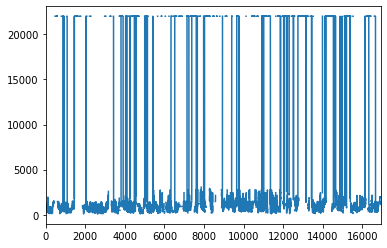

In [26]:
df['CIG'].plot(kind='line')

- we see many place with above 20000 (meter). Those are from 22000 value with a clear sky

next is **VIS** (visiblity)

**POS: 79-84**
    **VISIBILITY-OBSERVATION distance dimension**  
    
     The horizontal distance at which an object can be seen and identified.  
     MIN: 000000 MAX: 160000 UNITS: Meters  
     DOM: A general domain comprised of the numeric characters (0-9).  
     Missing = 999999  
     NOTE: Values greater than 160000 are entered as 160000 

In [27]:
 df['VIS'] =  df['VIS'].str.split(pat=',', expand=True)[0].astype(int)

In [28]:
df.head()

,DATE,WND,CIG,VIS,TMP,DEW,GA1
0,2018-01-01T00:00:00,"080,1,N,0015,1",1067.0,8000,16.0,12.0,"07,1,+01067,1,99,9"
1,2018-01-01T00:30:00,"060,1,N,0015,1",975.0,8000,16.0,12.0,"07,1,+00975,1,99,9"
2,2018-01-01T01:00:00,"080,1,N,0015,1",975.0,7000,16.0,12.0,"07,1,+00975,1,99,9"
3,2018-01-01T01:30:00,"060,1,V,0021,1",975.0,7000,17.0,12.0,"07,1,+00975,1,99,9"
4,2018-01-01T02:00:00,"080,1,N,0031,1",1006.0,7000,17.0,12.0,"04,1,+00762,1,99,9"


In [29]:
# and wind
df['WND'].str.split(pat=',', expand=True)

,0,1,2,3,4
0,080,1,N,0015,1
1,060,1,N,0015,1
2,080,1,N,0015,1
3,060,1,V,0021,1
4,080,1,N,0031,1
...,...,...,...,...,...
16906,020,1,N,0031,1
16907,030,1,N,0036,1
16908,020,1,N,0031,1
16909,030,1,N,0031,1


**format**  
0 - the angle 
1 - quality code for the wind direction  
2 - characters of this observation (N for Normal, V for Variable, C: Calm)  
3 - Wind speed (m/s), scaling factor of 10  
4 - Quality code for windspeed  

In [30]:
 df['WND'].str.split(pat=',', expand=True)[1].value_counts()

1    15202
9     1709
Name: 1, dtype: int64

In [31]:
 df['WND'].str.split(pat=',', expand=True)[2].value_counts()

N    8805
V    7988
C     118
Name: 2, dtype: int64

In [32]:
 df['WND'].str.split(pat=',', expand=True)[4].value_counts()

1    16904
9        6
2        1
Name: 4, dtype: int64

In [33]:
# look data is good quality
 df['WD'] =  df['WND'].str.split(pat=',', expand=True)[0].astype(int)

In [34]:
 df['WS'] = df['WND'].str.split(pat=',', expand=True)[3].astype(int)/10

In [35]:
df.head()

,DATE,WND,CIG,VIS,TMP,DEW,GA1,WD,WS
0,2018-01-01T00:00:00,"080,1,N,0015,1",1067.0,8000,16.0,12.0,"07,1,+01067,1,99,9",80,1.5
1,2018-01-01T00:30:00,"060,1,N,0015,1",975.0,8000,16.0,12.0,"07,1,+00975,1,99,9",60,1.5
2,2018-01-01T01:00:00,"080,1,N,0015,1",975.0,7000,16.0,12.0,"07,1,+00975,1,99,9",80,1.5
3,2018-01-01T01:30:00,"060,1,V,0021,1",975.0,7000,17.0,12.0,"07,1,+00975,1,99,9",60,2.1
4,2018-01-01T02:00:00,"080,1,N,0031,1",1006.0,7000,17.0,12.0,"04,1,+00762,1,99,9",80,3.1


In [36]:
df.drop(columns=['WND'], inplace=True)
df.head(3)

,DATE,CIG,VIS,TMP,DEW,GA1,WD,WS
0,2018-01-01T00:00:00,1067.0,8000,16.0,12.0,"07,1,+01067,1,99,9",80,1.5
1,2018-01-01T00:30:00,975.0,8000,16.0,12.0,"07,1,+00975,1,99,9",60,1.5
2,2018-01-01T01:00:00,975.0,7000,16.0,12.0,"07,1,+00975,1,99,9",80,1.5


**FLD LEN: 3**
 **SKY-COVER-LAYER identifier**
 
     The identifier that represents a SKY-COVER-LAYER.
     DOM: A specific domain comprised of the characters in the ASCII character set.
     GA1-GA6 An indicator of up to 6 repeating fields of the following items:
     SKY-COVER-LAYER coverage code
     SKY-COVER-LAYER coverage quality code
     SKY-COVER-LAYER base height dimension
     SKY-COVER-LAYER base height quality code
     SKY-COVER-LAYER cloud type code
     SKY-COVER-LAYER cloud type quality code

**SKY-COVER-LAYER coverage code**

     The code that denotes the fraction of the total celestial dome covered by a SKY-COVER-LAYER.
     Note: This is for a discrete cloud layer, as opposed to the cloud later summation data in the GD1-GD6 section.

**SKY-COVER-LAYER base height dimension**

     The height relative to a VERTICAL-REFERENCE-DATUM of the lowest surface of a cloud.
     MIN: -00400 MAX: +35000 UNITS: Meters
     SCALING FACTOR: 1
     DOM: A general domain comprised of the numeric characters (0-9), a plus sign (+), and a minus sign (-).
     +99999 = Missing
 
 https://www.ngs.noaa.gov/datums/vertical/#:~:text=A%20vertical%20datum%20is%20a,the%20surface%20of%20the%20earth.

In [37]:
# let split out GA columns
df['GA1'].str.split(pat=',', expand=True)[4].value_counts()

99    11390
08      250
09      213
Name: 4, dtype: int64

In [38]:
df['GA1'].str.split(pat=',', expand=True)[1].value_counts()

1    11853
Name: 1, dtype: int64

In [39]:
df['CLDCR'] = df['GA1'].str.split(pat=',', expand=True)[0].astype(float)/10

In [40]:
df['CLDHT'] = df['GA1'].str.split(pat=',', expand=True)[2].astype(float)

In [41]:
# and convert DATE column to proper data type
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

In [42]:
df.drop(columns=['GA1'], inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16911 entries, 2018-01-01 00:00:00 to 2018-12-31 23:30:00
Data columns (total 8 columns):
CIG      10942 non-null float64
VIS      16911 non-null int64
TMP      16911 non-null float64
DEW      16911 non-null float64
WD       16911 non-null int64
WS       16911 non-null float64
CLDCR    11853 non-null float64
CLDHT    11853 non-null float64
dtypes: float64(6), int64(2)
memory usage: 1.2 MB


In [44]:
# and save to file
df.to_csv('data/cleaned_noibai_noaa_isd_2018.csv')

In [45]:
# assume that you return to work the file, then this may help
df = pd.read_csv('data/cleaned_noibai_noaa_isd_2018.csv',
                parse_dates=['DATE'],
                index_col=['DATE'])

In [46]:
# sweet, you got the same information as before saving
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16911 entries, 2018-01-01 00:00:00 to 2018-12-31 23:30:00
Data columns (total 8 columns):
CIG      10942 non-null float64
VIS      16911 non-null int64
TMP      16911 non-null float64
DEW      16911 non-null float64
WD       16911 non-null int64
WS       16911 non-null float64
CLDCR    11853 non-null float64
CLDHT    11853 non-null float64
dtypes: float64(6), int64(2)
memory usage: 1.2 MB


In [47]:
# let bring a big tool,
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] =  (15,5)
plt.rcParams['font.sans-serif'] = 'Open Sans'

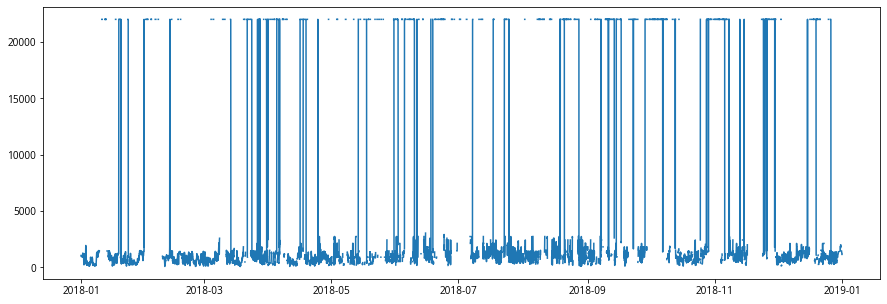

In [48]:
# not easy to see the pattern
plt.plot(df.index, df['CIG'])

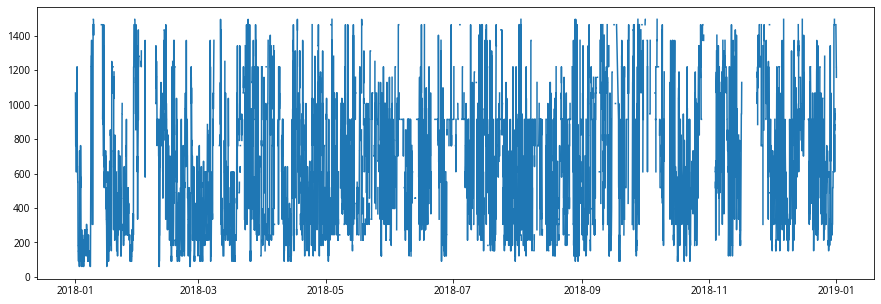

In [49]:
# let try out with cloud height, both CIG and CLDHT supposed to be similar (in a ball part)
plt.plot(df.index, df['CLDHT'])

In [50]:
df['CLDHT'].describe()

count    11853.000000
mean       612.704379
std        351.049698
min         61.000000
25%        305.000000
50%        549.000000
75%        914.000000
max       1494.000000
Name: CLDHT, dtype: float64

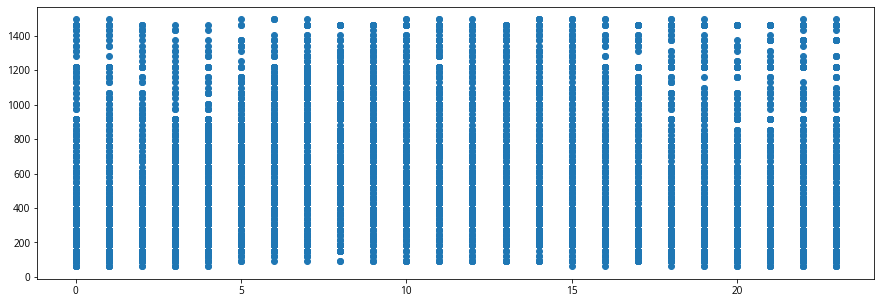

In [51]:
# let see the distribution by hour 
plt.scatter(df.index.hour, df['CLDHT'])

In [52]:
# cleaning with VIS
df.loc[df['VIS'] == 999999, 'VIS'] = None

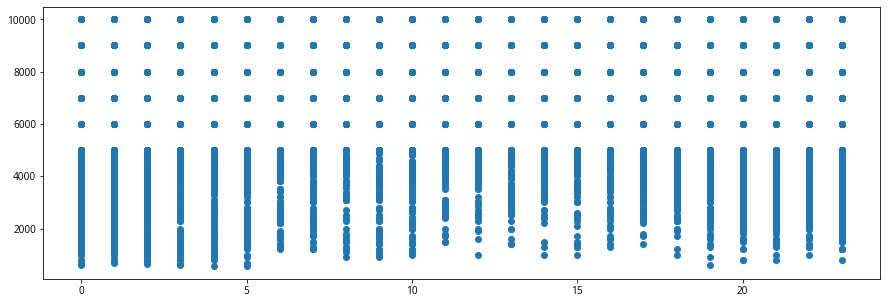

In [53]:
plt.scatter(df.index.hour, df['VIS'])

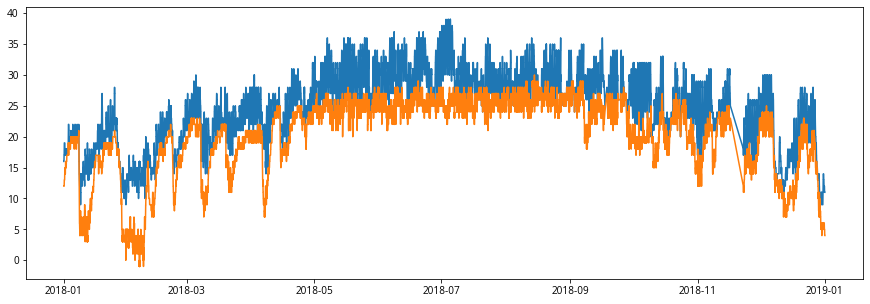

In [54]:
# let check out temperature
plt.plot(df.index, df.TMP)
plt.plot(df.index, df.DEW)

In [55]:
# if you want to zoom in certain part, use the command below
# plt.close()
# %matplotlib notebook
# plt.figure(figsize=(12,5))
# plt.plot(df.index, df.TMP)

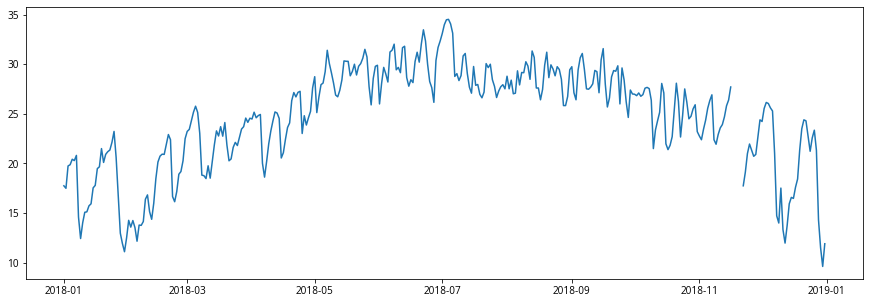

In [56]:
# %matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(df['TMP'].resample('1D').mean())
# yeah, the change of tempeature during the year is looking fine

## Working with Hadong site

In [57]:
# dfm.to_csv('handong_noaa_isd_2018.csv', index=False)

In [58]:
# In Hanoi, we have several locations that have data archieved on NCEI. here is another one
hadong = 488250# Ha dong
year = 2018
base_url = f'https://www.ncei.noaa.gov/data/global-hourly/access/{year}/{hadong}99999.csv'
base_url

'https://www.ncei.noaa.gov/data/global-hourly/access/2018/48825099999.csv'

In [59]:
dfm = pd.read_csv(base_url)
dfm.columns

Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AA3', 'AY1', 'AY2', 'GA1',
       'GA2', 'GA3', 'GE1', 'GF1', 'IA1', 'IA2', 'KA1', 'KA2', 'MA1', 'MD1',
       'MW1', 'REM', 'EQD'],
      dtype='object')

In [60]:
dfm.iloc[0]

STATION                                    48825099999
DATE                               2018-01-01T00:00:00
SOURCE                                               4
LATITUDE                                       20.9667
LONGITUDE                                      105.767
ELEVATION                                         7.91
NAME                                       HA DONG, VM
REPORT_TYPE                                      FM-12
CALL_SIGN                                        99999
QUALITY_CONTROL                                   V020
WND                                     140,1,N,0010,1
CIG                                        01250,1,9,9
VIS                                       004000,1,9,9
TMP                                            +0157,1
DEW                                            +0145,1
SLP                                            10189,1
AA1                                                NaN
AA2                                                NaN
AA3       

In [61]:
# For Ha dong, we have "GF1", so we will have a look

In [62]:
# filter
cols = ['DATE', 'WND', 'CIG', 'VIS', 'TMP', 'DEW', 'SLP', 'GA1', 'GF1']
dfm = dfm[cols]

In [63]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 9 columns):
DATE    2805 non-null object
WND     2805 non-null object
CIG     2805 non-null object
VIS     2805 non-null object
TMP     2805 non-null object
DEW     2805 non-null object
SLP     2805 non-null object
GA1     2456 non-null object
GF1     2759 non-null object
dtypes: object(9)
memory usage: 197.4+ KB


In [64]:
dfm.to_csv('data/hadong_noaa_isd_2018.csv', index=False)

In [65]:
! ls data/*

data/cleaned_hadong_noaa_isd_2018.csv
data/cleaned_hadong_noaa_isd_2018_withRH.csv
data/cleaned_Hanoi_PM2.5_2018_YTD.csv
data/cleaned_noibai_noaa_isd_2018.csv
data/cleaned_pm25_Hanoi_PM2.5_2018_YTD.csv
data/hadong_noaa_isd_2018.csv
data/Hanoi_PM2.5_2018_YTD.csv
data/noibai_noaa_isd_2018.csv
data/reduced_noibai_noaa_isd_2018.csv


- we have a number of files, depend on on which stage this writing go, you seeing could be different

In [66]:
# let load the file again, I use df name for this one
df = pd.read_csv('data/hadong_noaa_isd_2018.csv',
                parse_dates=['DATE'],
                index_col=['DATE'])
df.head(3)

,WND,CIG,VIS,TMP,DEW,SLP,GA1,GF1
DATE,,,,,,,,
2018-01-01 00:00:00,"140,1,N,0010,1","01250,1,9,9","004000,1,9,9","+0157,1","+0145,1","10189,1","02,1,+00450,1,08,1","08,99,1,02,1,99,9,00450,1,99,9,99,9"
2018-01-01 03:00:00,"140,1,N,0010,1","01250,1,9,9","010000,1,9,9","+0177,1","+0133,1","10202,1","02,1,+00450,1,08,1","08,99,1,02,1,99,9,00450,1,99,9,99,9"
2018-01-01 06:00:00,"090,1,N,0010,1","01250,1,9,9","010000,1,9,9","+0196,1","+0140,1","10174,1","02,1,+00450,1,08,1","07,99,1,02,1,99,9,00450,1,99,9,99,9"


In [67]:
# let go through cleaning one more time
df.WND.str.split(pat=',', expand=True)

,0,1,2,3,4
DATE,,,,,
2018-01-01 00:00:00,140,1,N,0010,1
2018-01-01 03:00:00,140,1,N,0010,1
2018-01-01 06:00:00,090,1,N,0010,1
2018-01-01 09:00:00,140,1,N,0010,1
2018-01-01 12:00:00,360,1,N,0000,1
...,...,...,...,...,...
2018-12-31 09:00:00,340,1,N,0020,1
2018-12-31 12:00:00,360,1,N,0010,1
2018-12-31 15:00:00,360,1,N,0020,1


In [68]:
df.WND.str.split(pat=',', expand=True)[1].value_counts() # look goood

1    2736
9      69
Name: 1, dtype: int64

In [69]:
df['WD'] = df.WND.str.split(pat=',', expand=True)[0].astype(int)

In [70]:
df.head()

,WND,CIG,VIS,TMP,DEW,SLP,GA1,GF1,WD
DATE,,,,,,,,,
2018-01-01 00:00:00,"140,1,N,0010,1","01250,1,9,9","004000,1,9,9","+0157,1","+0145,1","10189,1","02,1,+00450,1,08,1","08,99,1,02,1,99,9,00450,1,99,9,99,9",140
2018-01-01 03:00:00,"140,1,N,0010,1","01250,1,9,9","010000,1,9,9","+0177,1","+0133,1","10202,1","02,1,+00450,1,08,1","08,99,1,02,1,99,9,00450,1,99,9,99,9",140
2018-01-01 06:00:00,"090,1,N,0010,1","01250,1,9,9","010000,1,9,9","+0196,1","+0140,1","10174,1","02,1,+00450,1,08,1","07,99,1,02,1,99,9,00450,1,99,9,99,9",90
2018-01-01 09:00:00,"140,1,N,0010,1","01250,1,9,9","010000,1,9,9","+0192,1","+0143,1","10164,1","03,1,+00450,1,08,1","08,99,1,03,1,99,9,00450,1,99,9,99,9",140
2018-01-01 12:00:00,"360,1,N,0000,1","01250,1,9,9","010000,1,9,9","+0187,1","+0153,1","10178,1","03,1,+00450,1,08,1","08,99,1,03,1,99,9,00450,1,99,9,99,9",360


In [71]:
df.WND.str.split(pat=',', expand=True)[4].value_counts() # look goood

1    2736
9      69
Name: 4, dtype: int64

In [72]:
df['WS'] = df.WND.str.split(pat=',', expand=True)[3].astype(int)/10

In [73]:
df.head()

,WND,CIG,VIS,TMP,DEW,SLP,GA1,GF1,WD,WS
DATE,,,,,,,,,,
2018-01-01 00:00:00,"140,1,N,0010,1","01250,1,9,9","004000,1,9,9","+0157,1","+0145,1","10189,1","02,1,+00450,1,08,1","08,99,1,02,1,99,9,00450,1,99,9,99,9",140,1.0
2018-01-01 03:00:00,"140,1,N,0010,1","01250,1,9,9","010000,1,9,9","+0177,1","+0133,1","10202,1","02,1,+00450,1,08,1","08,99,1,02,1,99,9,00450,1,99,9,99,9",140,1.0
2018-01-01 06:00:00,"090,1,N,0010,1","01250,1,9,9","010000,1,9,9","+0196,1","+0140,1","10174,1","02,1,+00450,1,08,1","07,99,1,02,1,99,9,00450,1,99,9,99,9",90,1.0
2018-01-01 09:00:00,"140,1,N,0010,1","01250,1,9,9","010000,1,9,9","+0192,1","+0143,1","10164,1","03,1,+00450,1,08,1","08,99,1,03,1,99,9,00450,1,99,9,99,9",140,1.0
2018-01-01 12:00:00,"360,1,N,0000,1","01250,1,9,9","010000,1,9,9","+0187,1","+0153,1","10178,1","03,1,+00450,1,08,1","08,99,1,03,1,99,9,00450,1,99,9,99,9",360,0.0


In [74]:
df.CIG.str.split(pat=',', expand=True)[1].value_counts()

1    2154
9     651
Name: 1, dtype: int64

In [75]:
 df['CIG'] =  df['CIG'].str.split(pat=',', expand=True)[0].astype(int)

In [76]:
df.CIG.value_counts()

1250     1102
99999     651
22000     502
2750      372
800       163
450        12
3000        2
1500        1
Name: CIG, dtype: int64

In [77]:
df.loc[df['CIG'] == 99999, 'CIG'] = None

In [78]:
df.CIG.value_counts()

1250.0     1102
22000.0     502
2750.0      372
800.0       163
450.0        12
3000.0        2
1500.0        1
Name: CIG, dtype: int64

In [79]:
df['TMP'].str.split(pat=',', expand=True)[1].value_counts()

1    2803
2       2
Name: 1, dtype: int64

In [80]:
df['TMP'] = df['TMP'].str.split(pat=',', expand=True)[0].astype(int)/10

In [81]:
df['DEW'].str.split(pat=',', expand=True)[1].value_counts()

1    2804
2       1
Name: 1, dtype: int64

In [82]:
df['DEW'] = df['DEW'].str.split(pat=',', expand=True)[0].astype(int)/10

In [83]:
df.head()

,WND,CIG,VIS,TMP,DEW,SLP,GA1,GF1,WD,WS
DATE,,,,,,,,,,
2018-01-01 00:00:00,"140,1,N,0010,1",1250.0,"004000,1,9,9",15.7,14.5,"10189,1","02,1,+00450,1,08,1","08,99,1,02,1,99,9,00450,1,99,9,99,9",140,1.0
2018-01-01 03:00:00,"140,1,N,0010,1",1250.0,"010000,1,9,9",17.7,13.3,"10202,1","02,1,+00450,1,08,1","08,99,1,02,1,99,9,00450,1,99,9,99,9",140,1.0
2018-01-01 06:00:00,"090,1,N,0010,1",1250.0,"010000,1,9,9",19.6,14.0,"10174,1","02,1,+00450,1,08,1","07,99,1,02,1,99,9,00450,1,99,9,99,9",90,1.0
2018-01-01 09:00:00,"140,1,N,0010,1",1250.0,"010000,1,9,9",19.2,14.3,"10164,1","03,1,+00450,1,08,1","08,99,1,03,1,99,9,00450,1,99,9,99,9",140,1.0
2018-01-01 12:00:00,"360,1,N,0000,1",1250.0,"010000,1,9,9",18.7,15.3,"10178,1","03,1,+00450,1,08,1","08,99,1,03,1,99,9,00450,1,99,9,99,9",360,0.0


In [84]:
df['SLP'].str.split(pat=',', expand=True)[1].value_counts()

1    2803
9       2
Name: 1, dtype: int64

**new term**

**FLD LEN: 5**
 **ATMOSPHERIC-PRESSURE-OBSERVATION (STP/SLP) average station pressure for the day**
 
     The average pressure at the observed point for the day derived computationally from other QC’ed elements
     MIN: 04500 MAX: 10900 UNITS: hectopascals
     SCALING FACTOR: 10
     DOM: A general domain comprised of the numeric characters (0-9).
     99999 = Missing.

In [85]:
df['SLP'].str.split(pat=',', expand=True)[0].value_counts()

10140    28
10137    22
10121    22
10113    22
10136    21
         ..
10287     1
10210     1
10269     1
10288     1
09966     1
Name: 0, Length: 342, dtype: int64

In [86]:
df['SLP'] = df['SLP'].str.split(pat=',', expand=True)[0].astype(int)/10

In [87]:
df.head()

,WND,CIG,VIS,TMP,DEW,SLP,GA1,GF1,WD,WS
DATE,,,,,,,,,,
2018-01-01 00:00:00,"140,1,N,0010,1",1250.0,"004000,1,9,9",15.7,14.5,1018.9,"02,1,+00450,1,08,1","08,99,1,02,1,99,9,00450,1,99,9,99,9",140,1.0
2018-01-01 03:00:00,"140,1,N,0010,1",1250.0,"010000,1,9,9",17.7,13.3,1020.2,"02,1,+00450,1,08,1","08,99,1,02,1,99,9,00450,1,99,9,99,9",140,1.0
2018-01-01 06:00:00,"090,1,N,0010,1",1250.0,"010000,1,9,9",19.6,14.0,1017.4,"02,1,+00450,1,08,1","07,99,1,02,1,99,9,00450,1,99,9,99,9",90,1.0
2018-01-01 09:00:00,"140,1,N,0010,1",1250.0,"010000,1,9,9",19.2,14.3,1016.4,"03,1,+00450,1,08,1","08,99,1,03,1,99,9,00450,1,99,9,99,9",140,1.0
2018-01-01 12:00:00,"360,1,N,0000,1",1250.0,"010000,1,9,9",18.7,15.3,1017.8,"03,1,+00450,1,08,1","08,99,1,03,1,99,9,00450,1,99,9,99,9",360,0.0


In [88]:
df['GA1'].str.split(pat=',', expand=True)[1].value_counts()

1    2452
9       3
2       1
Name: 1, dtype: int64

In [89]:
df['CLDCR'] = df['GA1'].str.split(pat=',', expand=True)[0].astype(float)/10

In [90]:
 df['GA1'].str.split(pat=',', expand=True)[3].value_counts()

1    2455
9       1
Name: 3, dtype: int64

In [91]:
df['CLDHT'] = df['GA1'].str.split(pat=',', expand=True)[2].astype(float) # some NaN values

In [92]:
df.drop(columns=['WND', 'GA1', 'GF1'], inplace=True)

In [93]:
df.VIS.str.split(pat=',', expand=True)

,0,1,2,3
DATE,,,,
2018-01-01 00:00:00,004000,1,9,9
2018-01-01 03:00:00,010000,1,9,9
2018-01-01 06:00:00,010000,1,9,9
2018-01-01 09:00:00,010000,1,9,9
2018-01-01 12:00:00,010000,1,9,9
...,...,...,...,...
2018-12-31 09:00:00,010000,1,9,9
2018-12-31 12:00:00,010000,1,9,9
2018-12-31 15:00:00,010000,1,9,9


In [94]:
df.VIS.str.split(pat=',', expand=True)[1].value_counts()

1    2805
Name: 1, dtype: int64

In [95]:
df.VIS.str.split(pat=',', expand=True)[1]

DATE
2018-01-01 00:00:00    1
2018-01-01 03:00:00    1
2018-01-01 06:00:00    1
2018-01-01 09:00:00    1
2018-01-01 12:00:00    1
                      ..
2018-12-31 09:00:00    1
2018-12-31 12:00:00    1
2018-12-31 15:00:00    1
2018-12-31 18:00:00    1
2018-12-31 21:00:00    1
Name: 1, Length: 2805, dtype: object

In [96]:
df['VIS'] = df.VIS.str.split(pat=',', expand=True)[0].astype(int)

In [97]:
df.to_csv('data/cleaned_hadong_noaa_isd_2018.csv')

In [98]:
df.head()

,CIG,VIS,TMP,DEW,SLP,WD,WS,CLDCR,CLDHT
DATE,,,,,,,,,
2018-01-01 00:00:00,1250.0,4000,15.7,14.5,1018.9,140,1.0,0.2,450.0
2018-01-01 03:00:00,1250.0,10000,17.7,13.3,1020.2,140,1.0,0.2,450.0
2018-01-01 06:00:00,1250.0,10000,19.6,14.0,1017.4,90,1.0,0.2,450.0
2018-01-01 09:00:00,1250.0,10000,19.2,14.3,1016.4,140,1.0,0.3,450.0
2018-01-01 12:00:00,1250.0,10000,18.7,15.3,1017.8,360,0.0,0.3,450.0


# Relative humidity is not exist, could we somehow calculate them?

In [99]:
# ref: https://iridl.ldeo.columbia.edu/dochelp/QA/Basic/dewpoint.html
# the most simple way to to get RH if we know TMP and DEW is using this equation RH = 100 - 5(TMP-DEW)
# https://journals.ametsoc.org/bams/article-pdf/86/2/225/3931558/bams-86-2-225.pdf

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
https://doi.org/10.1175/BAMS-86-2-225
The Relationship between Relative Humidity and the Dewpoint Temperature in Moist Air
A Simple Conversion and Applications 

In [100]:
df['RH'] = df.apply(lambda row: 100 - 5*(row['TMP']-row['DEW']), axis=1)

**what is happening here?**

- `.apply()` is a very power function, and it takes another function called `lambda` as the input
- first `lambda` function calculate RH value for each row (`axis=1` specifies that the calculation is carried out on row)
- the `.apply()` take the calculation from `lambda` and apply to every row. If you specify, `axis=0`, the `.apply()` is carried out on column

In [101]:
df.to_csv('data/cleaned_hadong_noaa_isd_2018_withRH.csv')

In [102]:
df.head()

,CIG,VIS,TMP,DEW,SLP,WD,WS,CLDCR,CLDHT,RH
DATE,,,,,,,,,,
2018-01-01 00:00:00,1250.0,4000,15.7,14.5,1018.9,140,1.0,0.2,450.0,94.0
2018-01-01 03:00:00,1250.0,10000,17.7,13.3,1020.2,140,1.0,0.2,450.0,78.0
2018-01-01 06:00:00,1250.0,10000,19.6,14.0,1017.4,90,1.0,0.2,450.0,72.0
2018-01-01 09:00:00,1250.0,10000,19.2,14.3,1016.4,140,1.0,0.3,450.0,75.5
2018-01-01 12:00:00,1250.0,10000,18.7,15.3,1017.8,360,0.0,0.3,450.0,83.0


# let compare two sites and see anything interesting?

In [103]:
nb = pd.read_csv('data/cleaned_noibai_noaa_isd_2018.csv', parse_dates=['DATE'], index_col=['DATE'])
nb.head(3)

,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT
DATE,,,,,,,,
2018-01-01 00:00:00,1067.0,8000,16.0,12.0,80,1.5,0.7,1067.0
2018-01-01 00:30:00,975.0,8000,16.0,12.0,60,1.5,0.7,975.0
2018-01-01 01:00:00,975.0,7000,16.0,12.0,80,1.5,0.7,975.0


In [104]:
nb['RH'] = nb.apply(lambda x: 100 - 5*(x['TMP']-x['DEW']), axis=1)

In [105]:
# to make graph pretty
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] =  (15,5)
plt.rcParams['font.sans-serif'] = 'Open Sans'

In [106]:
hd = pd.read_csv('data/cleaned_hadong_noaa_isd_2018_withRH.csv', parse_dates=['DATE'], index_col=['DATE'])
hd.head(3)

,CIG,VIS,TMP,DEW,SLP,WD,WS,CLDCR,CLDHT,RH
DATE,,,,,,,,,,
2018-01-01 00:00:00,1250.0,4000,15.7,14.5,1018.9,140,1.0,0.2,450.0,94.0
2018-01-01 03:00:00,1250.0,10000,17.7,13.3,1020.2,140,1.0,0.2,450.0,78.0
2018-01-01 06:00:00,1250.0,10000,19.6,14.0,1017.4,90,1.0,0.2,450.0,72.0


**let check on the size of data**

In [107]:
# Noibai has 16k line a year
nb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16911 entries, 2018-01-01 00:00:00 to 2018-12-31 23:30:00
Data columns (total 9 columns):
CIG      10942 non-null float64
VIS      16911 non-null int64
TMP      16911 non-null float64
DEW      16911 non-null float64
WD       16911 non-null int64
WS       16911 non-null float64
CLDCR    11853 non-null float64
CLDHT    11853 non-null float64
RH       16911 non-null float64
dtypes: float64(7), int64(2)
memory usage: 1.3 MB


In [108]:
# and indeed, the measurement interval is 30 minutes each
nb.head()

,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT,RH
DATE,,,,,,,,,
2018-01-01 00:00:00,1067.0,8000,16.0,12.0,80,1.5,0.7,1067.0,80.0
2018-01-01 00:30:00,975.0,8000,16.0,12.0,60,1.5,0.7,975.0,80.0
2018-01-01 01:00:00,975.0,7000,16.0,12.0,80,1.5,0.7,975.0,80.0
2018-01-01 01:30:00,975.0,7000,17.0,12.0,60,2.1,0.7,975.0,75.0
2018-01-01 02:00:00,1006.0,7000,17.0,12.0,80,3.1,0.4,762.0,75.0


In [109]:
# for Ha Dong site
hd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2805 entries, 2018-01-01 00:00:00 to 2018-12-31 21:00:00
Data columns (total 10 columns):
CIG      2154 non-null float64
VIS      2805 non-null int64
TMP      2805 non-null float64
DEW      2805 non-null float64
SLP      2805 non-null float64
WD       2805 non-null int64
WS       2805 non-null float64
CLDCR    2456 non-null float64
CLDHT    2456 non-null float64
RH       2805 non-null float64
dtypes: float64(8), int64(2)
memory usage: 241.1 KB


In [110]:
hd.head()

,CIG,VIS,TMP,DEW,SLP,WD,WS,CLDCR,CLDHT,RH
DATE,,,,,,,,,,
2018-01-01 00:00:00,1250.0,4000,15.7,14.5,1018.9,140,1.0,0.2,450.0,94.0
2018-01-01 03:00:00,1250.0,10000,17.7,13.3,1020.2,140,1.0,0.2,450.0,78.0
2018-01-01 06:00:00,1250.0,10000,19.6,14.0,1017.4,90,1.0,0.2,450.0,72.0
2018-01-01 09:00:00,1250.0,10000,19.2,14.3,1016.4,140,1.0,0.3,450.0,75.5
2018-01-01 12:00:00,1250.0,10000,18.7,15.3,1017.8,360,0.0,0.3,450.0,83.0


- so even two sites with recent data, the interval measurement can be different. Ha Dong site has data read for every 3 hours,
- I prefer meteorological data that as close the observation of PM<sub>2.5</sub> as possible, but in this case, also means as the cost of data richness

## Temperature

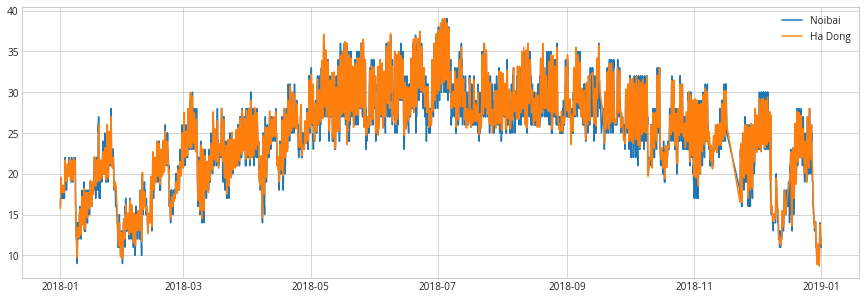

In [111]:
# first let have a look at data in 2018 (whole year)
plt.plot(nb.index, nb.TMP, label='Noibai', )
plt.plot(hd.index, hd.TMP, label='Ha Dong')
plt.legend()

<IPython.core.display.Javascript object>


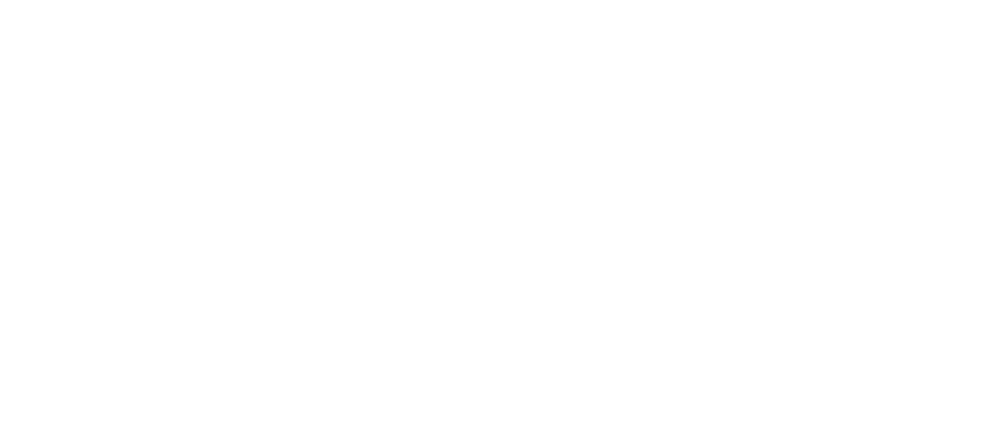

<IPython.core.display.Javascript object>


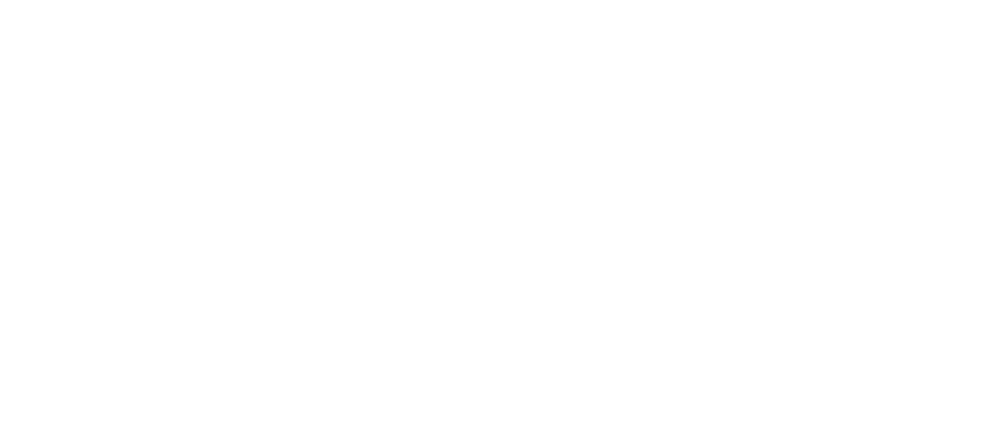

In [112]:
# you may need to run twice so the the interaction mode kicked in
plt.close()
%matplotlib notebook
plt.figure(figsize=(14,6))
plt.plot(nb.index, nb.TMP, label='Noibai', alpha=0.8)
plt.plot(hd.index, hd.TMP, label='Ha Dong', alpha=0.8)
# plt.legend()

with this mode, you can zoom in and move the chart around the explore data

**in case, the *interactive mode* is not familar to you, here is how it look**

![interactive mode](./img/sc_interactive_mode.png)

In [113]:
# back to normal mode
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] =  (15,5)
plt.rcParams['font.sans-serif'] = 'Open Sans'

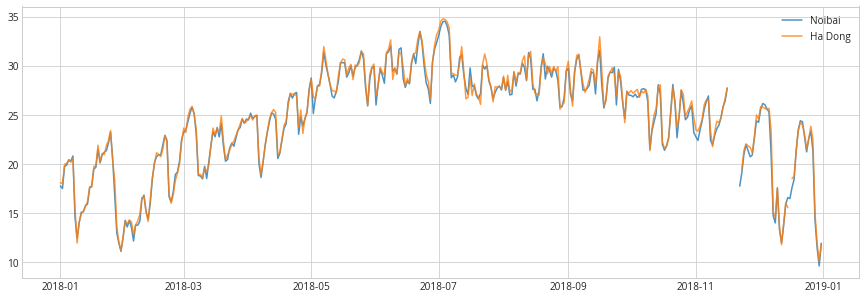

In [114]:
# they look similar in a ball part let see them daily
nbd = nb.resample('1D').mean()
hdd = hd.resample('1D').mean()
plt.plot(nbd.index, nbd.TMP, label='Noibai', alpha=0.8)
plt.plot(hdd.index, hdd.TMP, label='Ha Dong', alpha=0.8)
plt.legend()

In [115]:
# let have a closer look, first we need to precisely define timestime 
import datetime

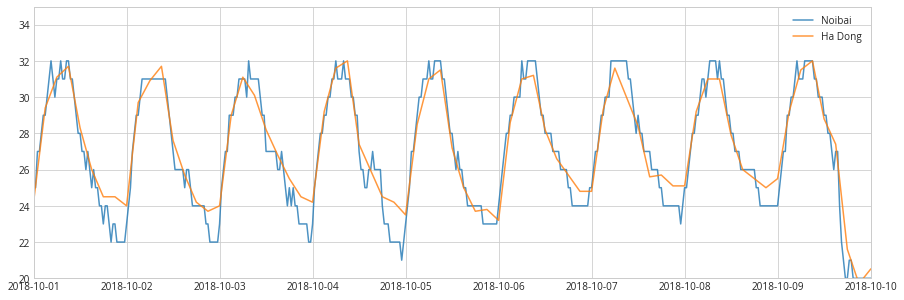

In [116]:
# late fall
left = datetime.datetime(2018,10,1)
right = datetime.datetime(2018,10,10)
plt.plot(nb.index, nb.TMP, label='Noibai', alpha=0.8)
plt.plot(hd.index, hd.TMP, label='Ha Dong', alpha=0.8)
plt.xlim(left, right)
plt.ylim(20,35)
plt.legend()

- it is expected, the station in the urban area has some heat retension. It is clear that the temperature in Ha Dong site is higher right before the sunrise than the suburban site (Noibai Airport)
- sparse interval of Ha dong already show missing trends
- let examine some more

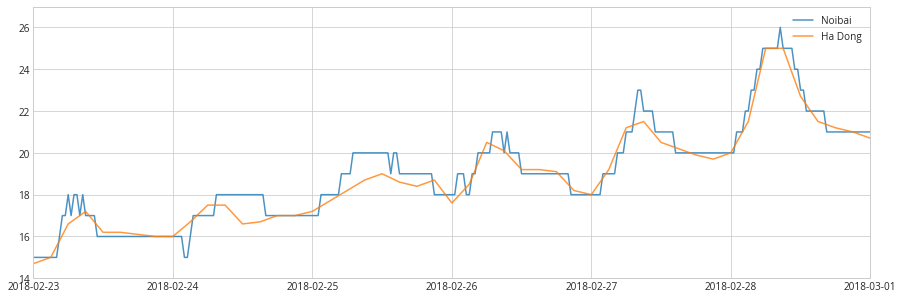

In [117]:
# late spring
left = datetime.datetime(2018,2,23)
right = datetime.datetime(2018,3,1)
plt.plot(nb.index, nb.TMP, label='Noibai', alpha=0.8)
plt.plot(hd.index, hd.TMP, label='Ha Dong', alpha=0.8)
plt.xlim(left, right)
plt.ylim(14,27)
plt.legend()

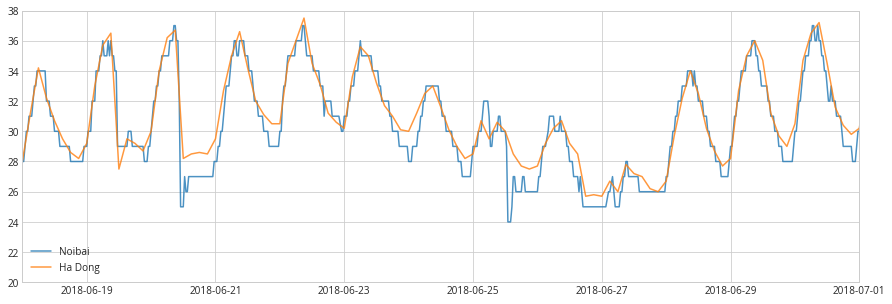

In [118]:
# right in the middle of summer
left = datetime.datetime(2018,6,18)
right = datetime.datetime(2018,7,1)
plt.plot(nb.index, nb.TMP, label='Noibai', alpha=0.8)
plt.plot(hd.index, hd.TMP, label='Ha Dong', alpha=0.8)
plt.xlim(left, right)
plt.ylim(20,38)
plt.legend()

## Wind

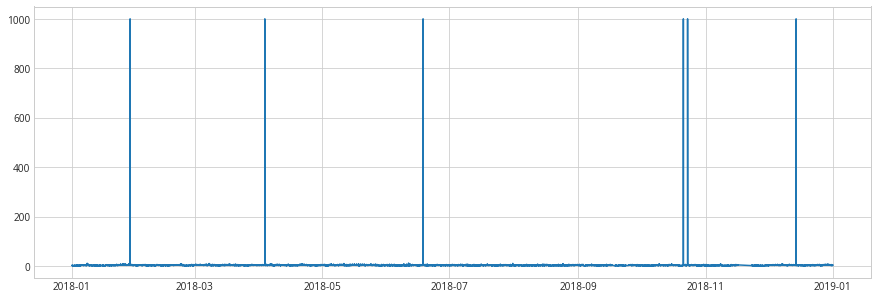

In [119]:
plt.plot(nb.index, nb.WS)

**oh no, I forgot the remove `999` value, which marked for missing entry**, let check it out

In [120]:
nb.query('WS>999')

,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT,RH
DATE,,,,,,,,,
2018-01-28 22:30:00,1219.0,9999,11.0,4.0,999,999.9,0.7,1219.0,65.0
2018-04-03 13:30:00,NaN,999999,25.0,19.0,999,999.9,NaN,NaN,70.0
2018-06-18 11:00:00,NaN,999999,31.0,26.0,999,999.9,NaN,NaN,75.0
2018-10-21 07:30:00,NaN,999999,32.0,22.0,999,999.9,NaN,NaN,50.0
2018-10-23 08:00:00,1372.0,9999,27.0,25.0,999,999.9,0.4,518.0,90.0
2018-12-14 09:30:00,1219.0,9999,18.0,11.0,999,999.9,0.4,914.0,65.0


In [121]:
nb.loc[nb['WD']==999, 'WD'] = None

In [122]:
hd.loc[hd['WD']==999, 'WD'] = None

In [123]:
# and wind direction of 9999, (also for missing value)
nb.loc[nb['WS']==999.9, 'WS'] = None

In [124]:
hd.loc[hd['WS']==999.9, 'WS'] = None

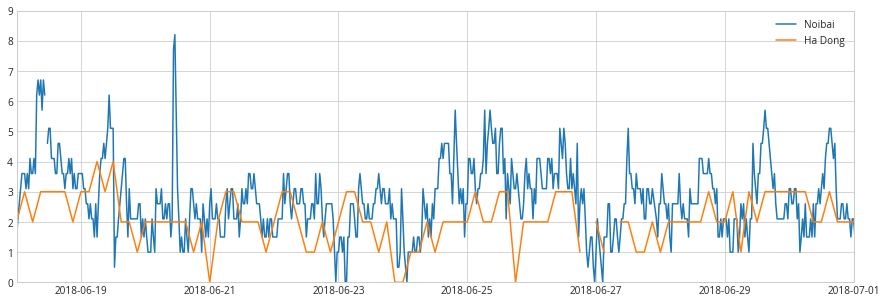

In [125]:
left = datetime.datetime(2018,6,18)
right = datetime.datetime(2018,7,1)
plt.plot(nb.index, nb.WS, label='Noibai')
plt.plot(hd.index, hd.WS, label='Ha Dong')
plt.xlim(left, right)
plt.ylim(0,9)
plt.legend()

In [126]:
nb.WS.mean(), hd.WS.mean()

(2.852913339248087, 2.000730994152047)

- in compare to temperature, the wind speed data is **very different** between two sites
- wind speed in Ha Dong is much lower than in Noibai, which make sense
- the average of mean value is about 1/3 difference

**visualize wind speed and direction is not easy as the data point, we need to resource to a special package called <a style='color:red'>windrose</a>**
- check out the [windrose package](https://windrose.readthedocs.io/en/latest/usage.html#script-example) 

In [127]:
! pip install windrose --upgrade

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: windrose in /usr/local/lib/python3.6/dist-packages (1.6.7)


In [128]:
from windrose import WindroseAxes
# from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

/usr/local/lib/python3.6/dist-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/usr/local/lib/python3.6/dist-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/usr/local/lib/python3.6/dist-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/usr/local/lib/python3.6/dist-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  retu

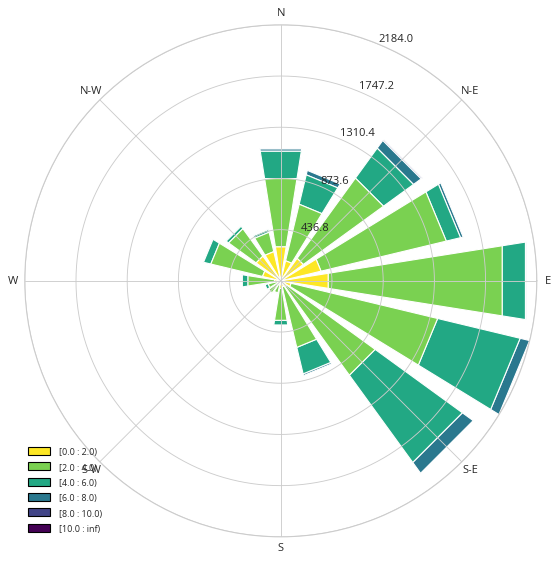

In [129]:
# let visualize wind speed and wind direction of Noibai
wd = nb.WD
ws = nb.WS
ax = WindroseAxes.from_ax()
bins = np.arange(0,12,2)
ax.bar(wd, ws, normed=False, edgecolor='white', bins=bins,  cmap=cm.viridis_r)
ax.set_legend()

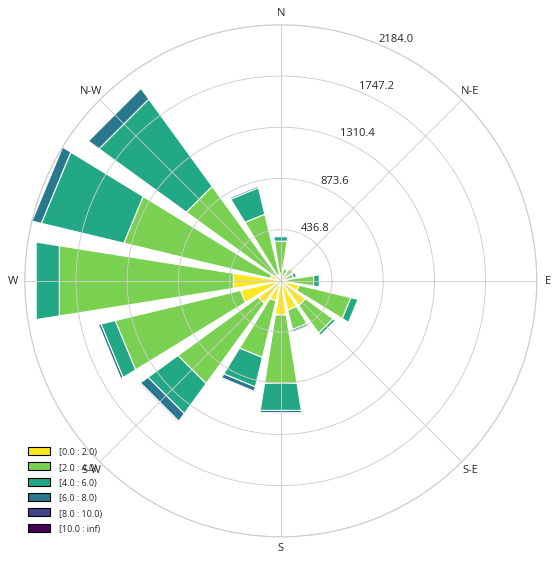

In [130]:
# and the same site with blowto=True option
wd = nb.WD
ws = nb.WS
ax = WindroseAxes.from_ax()
bins = np.arange(0,12,2)
ax.bar(wd, ws, normed=False, blowto=True, edgecolor='white', bins=bins,  cmap=cm.viridis_r)
ax.set_legend()

- yes, the *blowto* change direction of the wind but how to what does this mean to connect with the outside
- the graph above (with major colors in South-East cornor) is to show where the wind comes from. So if you stand outside and facing to the South-East, you should feel to wind blows on your face
- the graph with **blowto=True** is suitable when showing the disperse of pollutants. For example, if you have a chimney at the origin, in next hours, you should see the smoke blows to the North-East direction

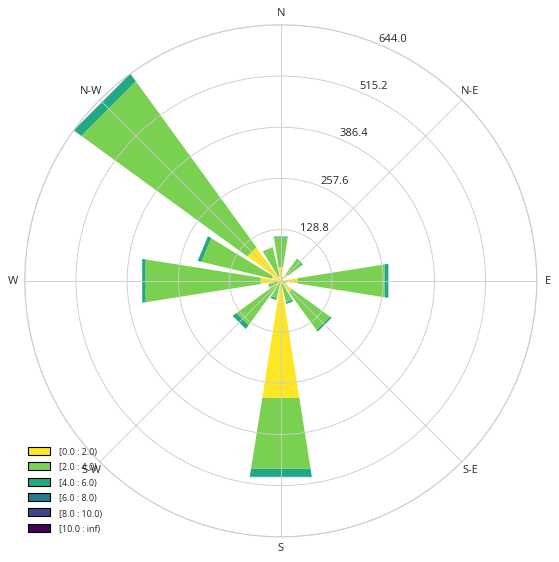

In [131]:
# how about Ha dong site
wd = hd.WD
ws = hd.WS
ax = WindroseAxes.from_ax()
bins = np.arange(0,12,2)
ax.bar(wd, ws, normed=False, bins=bins, blowto=True, cmap=cm.viridis_r)
ax.set_legend()

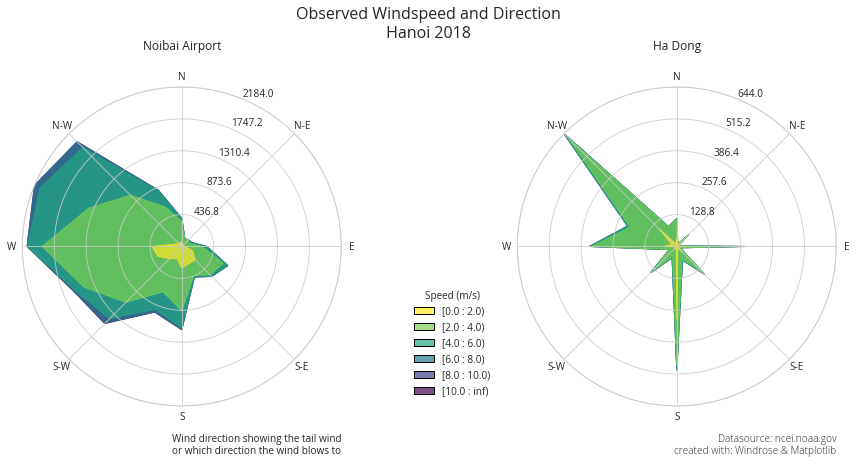

In [132]:
# and ofcourse, you want to present side-by-site
fig = plt.figure(figsize=(12,6.5))
ax = fig.add_subplot(121, projection="windrose", )

ax.contourf(nb.WD, nb.WS, bins=np.arange(0, 12, 2), cmap=cm.viridis_r, alpha=0.7, blowto=True)

ax.legend(bbox_to_anchor=(1.2, 0), title='Speed (m/s)')
ax.set_title('Noibai Airport', y=1.1)
ax1 = fig.add_subplot(122, projection="windrose")
ax1.contourf(hd.WD, hd.WS, bins=np.arange(0, 12, 2), cmap=cm.viridis_r, alpha=0.7, blowto=True)
ax1.set_title('Ha Dong', y=1.1)
fig.suptitle('Observed Windspeed and Direction\nHanoi 2018', fontsize=16)
fig.subplots_adjust(bottom=0.2)
fig.text(1,-0.15, 'Datasource: ncei.noaa.gov\ncreated with: Windrose & Matplotlib',
         transform=ax1.transAxes, ha='right', weight='light')
fig.text(1,-0.15, 'Wind direction showing the tail wind\nor which direction the wind blows to', 
         transform=ax.transAxes, ha='right', weight='book')

fig.tight_layout()
fig.savefig('img/2020Jul_windrose_noibai_hadong.png', dpi=120)

- the graph above is a sort of deal-breaker, a closer and more representative to urban area is not very rich in data
- we will work with `Noibai` site, since PM<sub>2.5</sub> is a regional pollutant, so a location like in a nearby airport would be a fine choice to see the overall wind pattern

In [133]:
# can we do more with wind
nb['m'] = nb.index.month

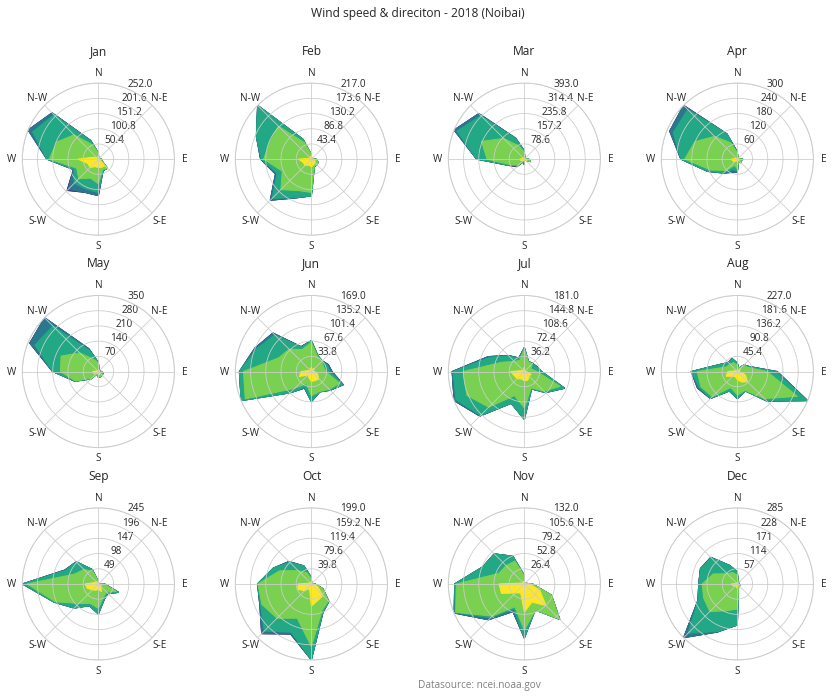

In [134]:
nrows, ncols = 3, 4
year = 2018
fig = plt.figure(figsize=(12,9))
bins = np.arange(0.01, 12, 2)

fig.suptitle("Wind speed & direciton - %d (Noibai)" % year,y=1.05)
for month in range(1, 13):
    ax = fig.add_subplot(nrows, ncols, month, projection="windrose")
    title = datetime.datetime(year, month, 1).strftime("%b")
    ax.set_title(title,y=1.15)
    try:
        dft = nb[['WS', 'WD', 'm']].query(f'm=={month}')
    except KeyError:
        continue
    direction = dft['WD']
    var = dft['WS']

    ax.contourf(direction, var, bins=bins, cmap=cm.viridis_r, blowto=True)
    fig.subplots_adjust(hspace=0.6)
fig.text(0.5,0,'Datasource: ncei.noaa.gov', color='gray')
fig.tight_layout()
fig.savefig('img/2020Jul_subplot_windrose.png', dpi=120)

- and now you can see the wind direction, and wind speed differ on each month.
- For 

## Relative Humidity

In [135]:
# and here the paper to convert RH from air temperature and dewpoint temperature 
# https://pdfs.semanticscholar.org/e873/a898ba9373af4e12907841411f3e9d83cb9a.pdf

In [136]:
nb['RH'] = nb.apply(lambda row: 100-5*(row['TMP']-row['DEW']), axis=1)

In [137]:
nb.head()

,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT,RH,m
DATE,,,,,,,,,,
2018-01-01 00:00:00,1067.0,8000,16.0,12.0,80.0,1.5,0.7,1067.0,80.0,1
2018-01-01 00:30:00,975.0,8000,16.0,12.0,60.0,1.5,0.7,975.0,80.0,1
2018-01-01 01:00:00,975.0,7000,16.0,12.0,80.0,1.5,0.7,975.0,80.0,1
2018-01-01 01:30:00,975.0,7000,17.0,12.0,60.0,2.1,0.7,975.0,75.0,1
2018-01-01 02:00:00,1006.0,7000,17.0,12.0,80.0,3.1,0.4,762.0,75.0,1


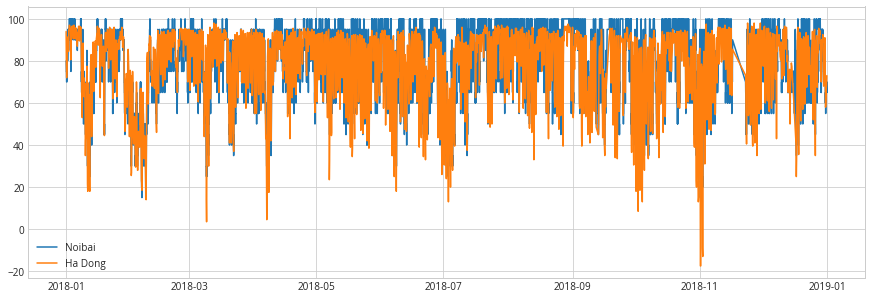

In [138]:
plt.plot(nb.index, nb.RH , label='Noibai',)
plt.plot(hd.index, hd.RH, label='Ha Dong')
plt.legend()

- look like in Ha dong site, the RH is lower than in Noibai,
- and around November, a minus RH (which is not possible)

In [139]:
hd[hd['RH'] < 0]

,CIG,VIS,TMP,DEW,SLP,WD,WS,CLDCR,CLDHT,RH
DATE,,,,,,,,,,
2018-11-01 06:00:00,22000.0,10000,29.0,5.5,1015.3,360.0,3.0,NaN,NaN,-17.5
2018-11-01 09:00:00,22000.0,10000,29.2,5.7,1014.3,320.0,2.0,NaN,NaN,-17.5
2018-11-02 06:00:00,22000.0,20000,28.5,6.7,1016.0,360.0,2.0,NaN,NaN,-9.0
2018-11-02 09:00:00,22000.0,20000,29.0,6.4,1014.3,270.0,3.0,NaN,NaN,-13.0


- wow, the air is really dry, but the RH is between 0 and 100%, so we will fix it using `loc` 

In [140]:
hd.loc[hd['RH']<0, 'RH'] = 0

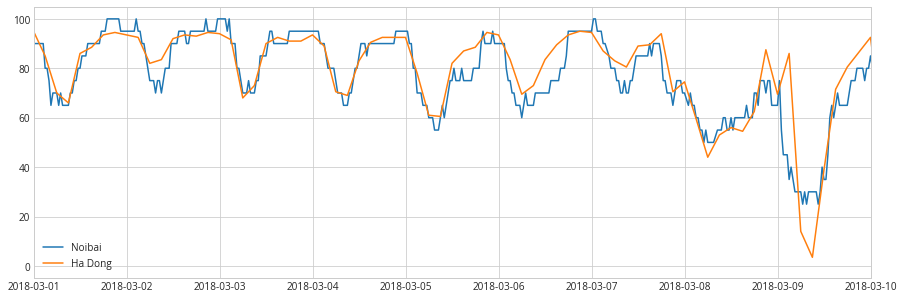

In [141]:
left = datetime.datetime(2018,3,1)
right = datetime.datetime(2018, 3,10)
plt.plot(nb.index, nb.RH , label='Noibai',)
plt.plot(hd.index, hd.RH, label='Ha Dong')
plt.xlim(left, right)
plt.legend()

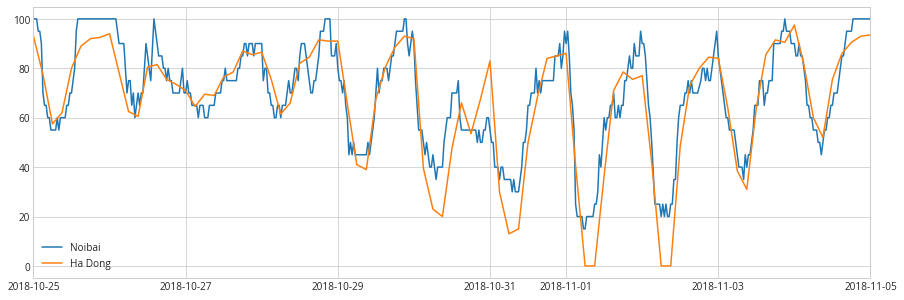

In [142]:
left = datetime.datetime(2018,10,25)
right = datetime.datetime(2018, 11,5)
plt.plot(nb.index, nb.RH , label='Noibai',)
plt.plot(hd.index, hd.RH, label='Ha Dong')
plt.xlim(left, right)
plt.legend()

## Ceiling height
- this is important parameter to indicate how thick the mixing layer near the ground

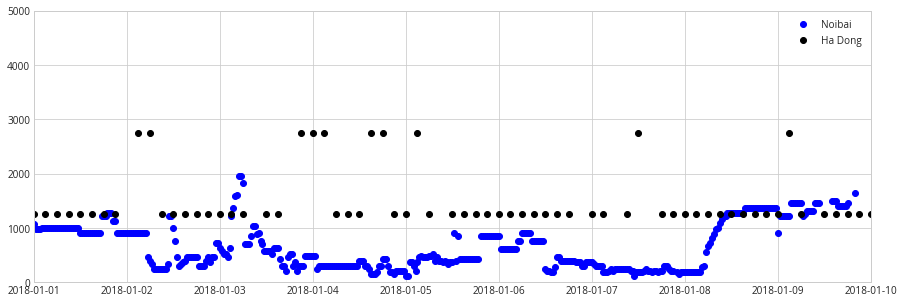

In [143]:
left = datetime.datetime(2018,1,1)
right = datetime.datetime(2018,1,10)
plt.plot(nb.index, nb.CIG,  'bo', label='Noibai',)
plt.plot(hd.index, hd.CIG, 'ko', label='Ha Dong')
plt.xlim(left, right)
plt.ylim(0,5000)
plt.legend()

- the data from Ha Dong is not so informative, so I have enough reason to take Noibai data for the next analysis

# Concluding notes

So we have go through several step in this exercise
- First, we explore the possiblity to acquire meteorological data. For historical one, data on `ncei.noaa.gov` is an excellent stop
- The data from this site requires rather extensive data wrangle and cleaning. We've gone through using `str.split`, `loc` to take the relevant data, and settling data with `None` with missing value
- We can calculate `RH` by using the simple approximation using `air temperature` and `dewpoint temperature`
- Data from two sites near Hanoi were explored by main parameters
- We use `windrose` package to visualize wind speed and wind direction